FIND BUG IN MRF/BELIEF PROPAGATION CODE
- what's blowing up into 32 dimensions 

Testing computational limits of MRF

1. try approximate inference algo to speed up computation

thoughts: slowness of inference might be due to the fact that our graph is fully connected, not just edges for surrounding pixels

KEEP TRYING THIS
- could we assign cutoff for edges below a threshold of counts to decrease the size of the graph?
IS THIS FLEXIBLE FOR FULLY CONNECTED GRAPH?
- is pomegranate a faster option?

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation
import daft
import random
import itertools


In [228]:
object_list = pd.read_excel('C:/Users/karae/github repositories/vrrl/cooccurrence/post_objects.xlsx', header=None)
objects = []

for i in range(len(object_list)):
    
    objects.append(object_list.iloc[i][0][6:])

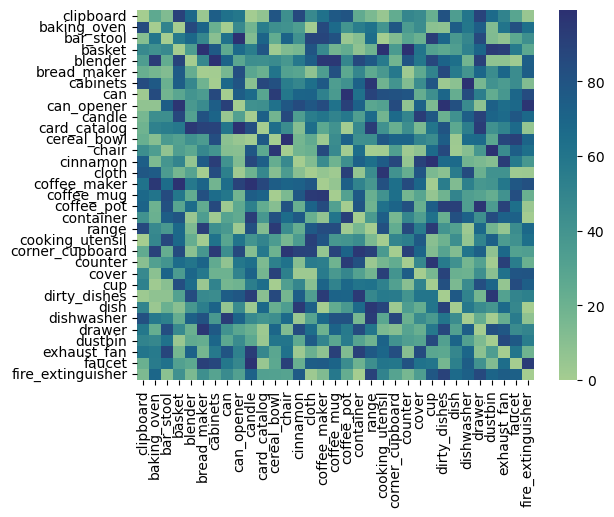

In [229]:
# counts
n = 33

cooccur = np.random.randint(low=0,high=100,size=(n,n))
np.fill_diagonal(cooccur,0)
objects = objects[0:cooccur.shape[0]]

sns.heatmap(cooccur,xticklabels=objects,yticklabels=objects,cmap='crest')

cooccur = pd.DataFrame(cooccur,index=objects,columns=objects)

In [230]:
# instantiate network
G = MarkovNetwork()

# create graph (add nodes and edges)
nodes = objects
edges = list(itertools.combinations(objects,r=2))

G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [234]:
# phi 
def compatibility(edge):
    
    tt = cooccur.loc[edge[0],edge[1]] / np.sum(cooccur.loc[edge[0],:])
    ft = (np.sum(cooccur.loc[:,edge[1]])-cooccur.loc[edge[0],edge[1]]) / (np.sum(np.triu(np.asarray(cooccur)))-np.sum(cooccur.loc[edge[0],:]))
    tf = 1 - tt
    ff = 1 - ft

    phi = [ff, ft, tf, tt]
    
    return phi

In [235]:
compatibility(edges[0])

[0.9448407230282889,
 0.055159276971711114,
 0.9824561403508771,
 0.017543859649122806]

In [240]:
# create factors
for edge in G.edges():
    #factor = DiscreteFactor(edge, [2, 2], values=compatibility(edge))
    factor = DiscreteFactor(edge, cardinality=[2, 2], values=np.random.rand(4))
    G.add_factors(factor)
    
#print(G.edges())
factor.assignment([0,1,2,3])

[[('faucet', 0), ('fire_extinguisher', 0)],
 [('faucet', 0), ('fire_extinguisher', 1)],
 [('faucet', 1), ('fire_extinguisher', 0)],
 [('faucet', 1), ('fire_extinguisher', 1)]]

In [244]:
G.markov_blanket('faucet')

In [246]:
# inference
#G_infer = BeliefPropagation(G)
# G_prob = G_infer.query(variables=['clipboard'], evidence={'container': 0})
# print(G_prob)
G_tri = G.triangulate()

In [247]:
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
G = MarkovNetwork()
G.add_nodes_from(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'])
G.add_edges_from([('x1', 'x3'), ('x1', 'x4'), ('x2', 'x4'),
                  ('x2', 'x5'), ('x3', 'x6'), ('x4', 'x6'),
                  ('x4', 'x7'), ('x5', 'x7')])
phi = [DiscreteFactor(edge, [2, 2], np.random.rand(4)) for edge in G.edges()]
G.add_factors(*phi)
G_chordal = G.triangulate()
G_infer = BeliefPropagation(G)

ValueError: maximum supported dimension for an ndarray is 32, found 33

In [249]:
for dim in range (1, 100):
    arr_n_dim_list = [1]*dim
    arr_n_dim = np.ones((arr_n_dim_list))
    print(arr_n_dim.shape)

(1,)
(1, 1)
(1, 1, 1)
(1, 1, 1, 1)
(1, 1, 1, 1, 1)
(1, 1, 1, 1, 1, 1)
(1, 1, 1, 1, 1, 1, 1)
(1, 1, 1, 1, 1, 1, 1, 1)
(1, 1, 1, 1, 1, 1, 1, 1, 1)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)

ValueError: maximum supported dimension for an ndarray is 32, found 33